<font size='2'>Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [8]:
# ##Converting category labels into numerical using LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# label.fit(df.sex.drop_duplicates())
# df.sex = label.transform(df.sex)
# label.fit(df.smoker.drop_duplicates())
# df.smoker = label.transform(df.smoker)
# label.fit(df.region.drop_duplicates())
# df.region = label.transform(df.region)
# df.dtypes

Scaler saved as 'standard_scaler.pkl'
Model Performance Summary:
                    Model  Train R2   Test R2     Train MSE      Test MSE
0  Linear Regression (GD)  0.741705  0.783344  3.728066e+07  3.363556e+07
1           Decision Tree  0.914874  0.830618  1.228653e+07  2.629635e+07
2           Random Forest  0.909952  0.878061  1.299698e+07  1.893083e+07


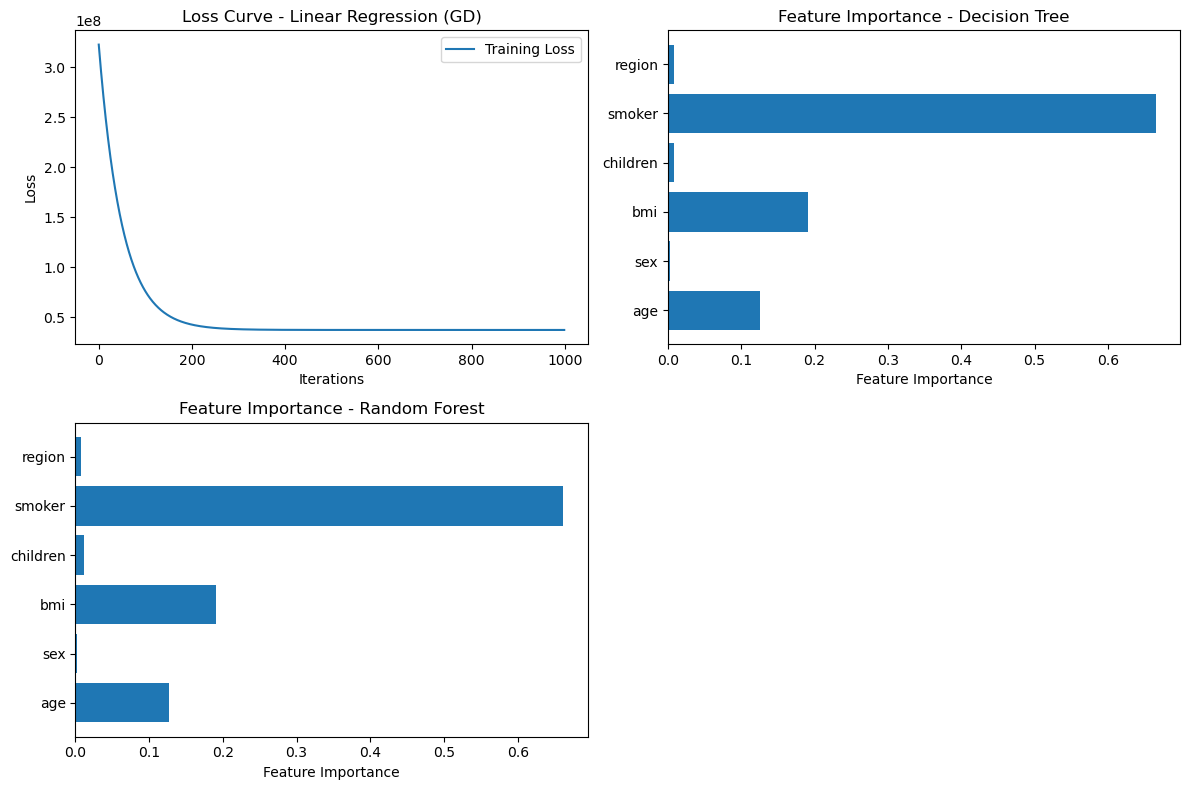

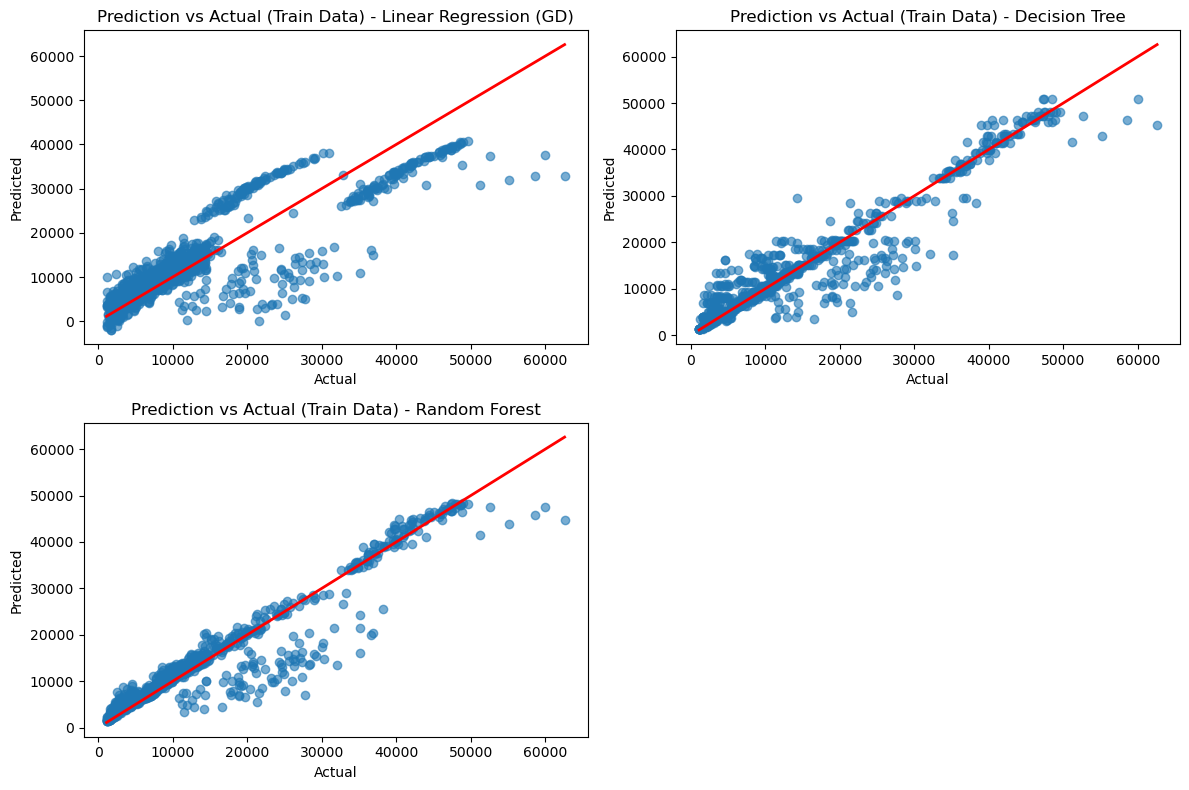

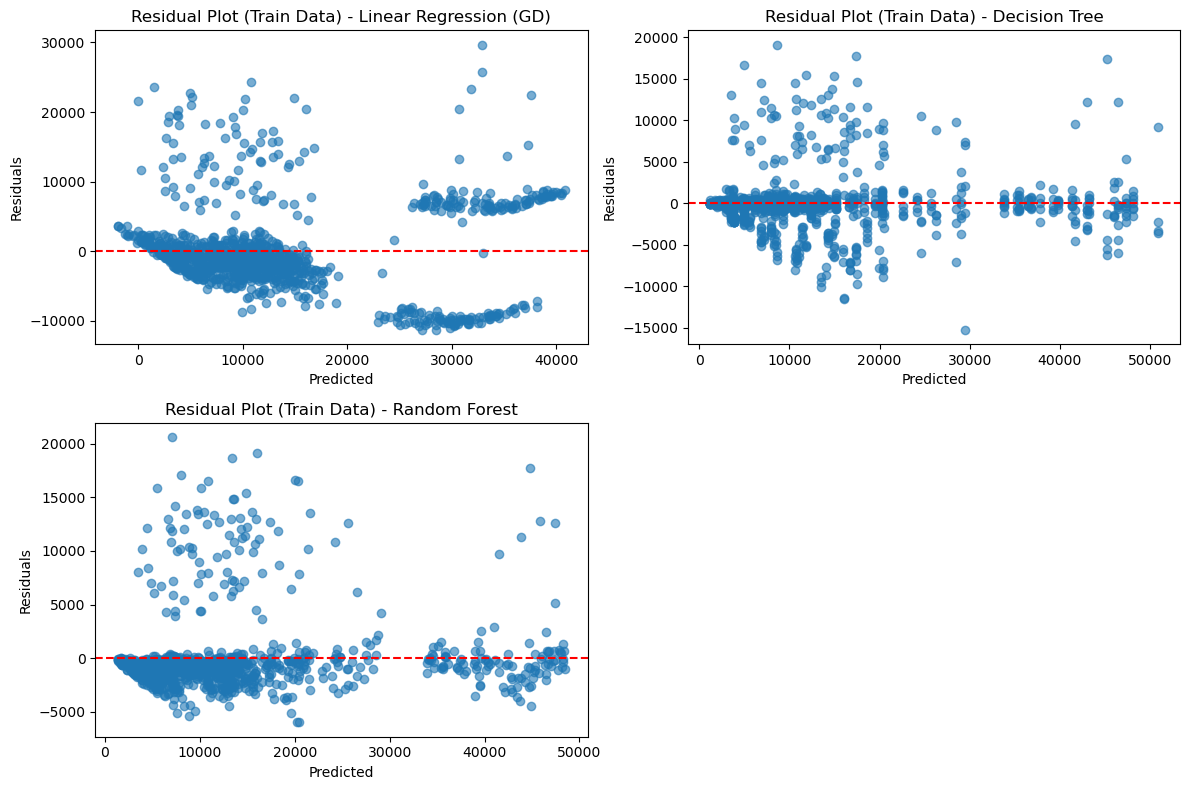

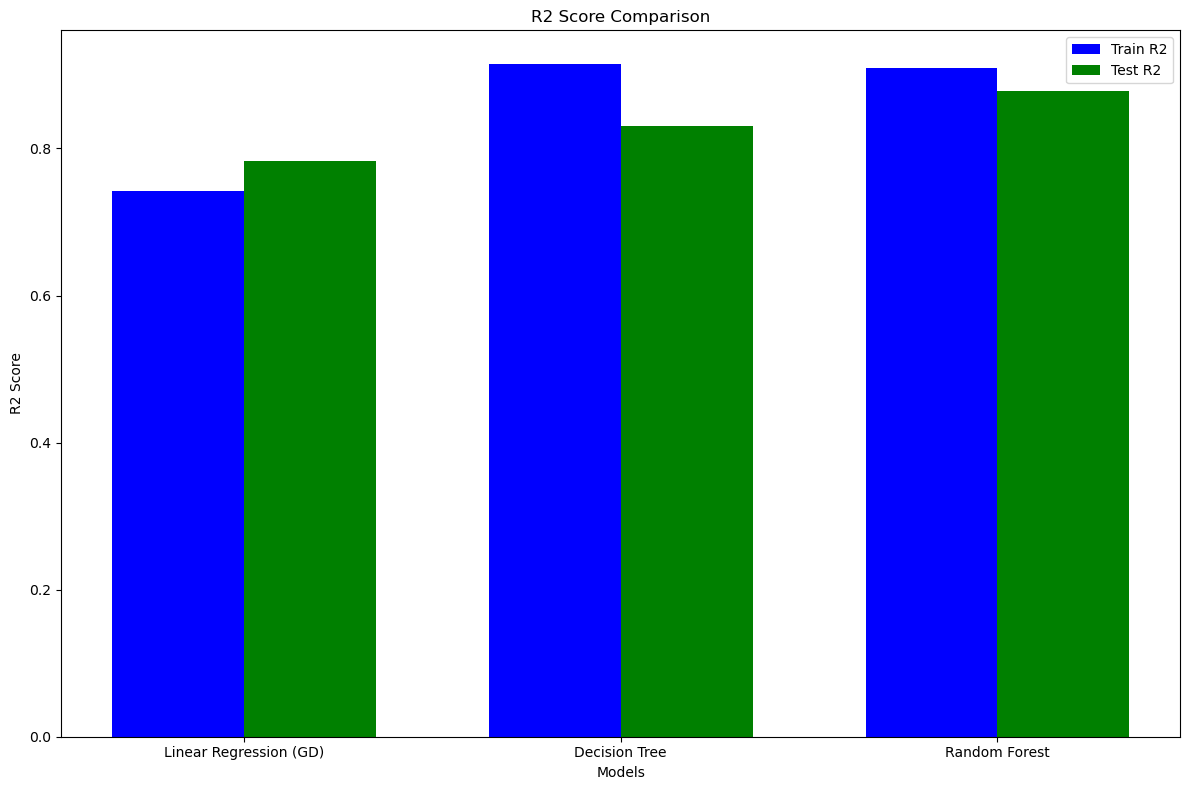


Best Performing Model: Random Forest
Best model saved as 'Random Forest_best_model.pkl'

Prediction for one data point in the test dataset: [8923.60907656]


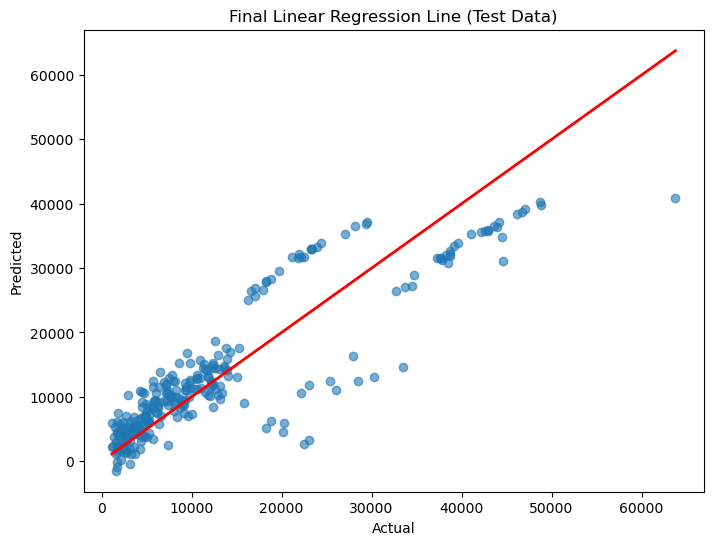

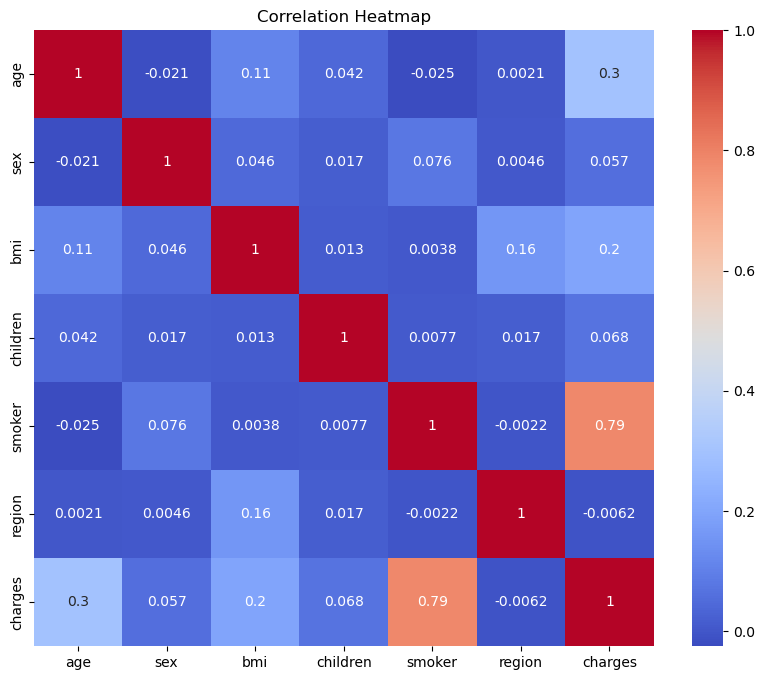

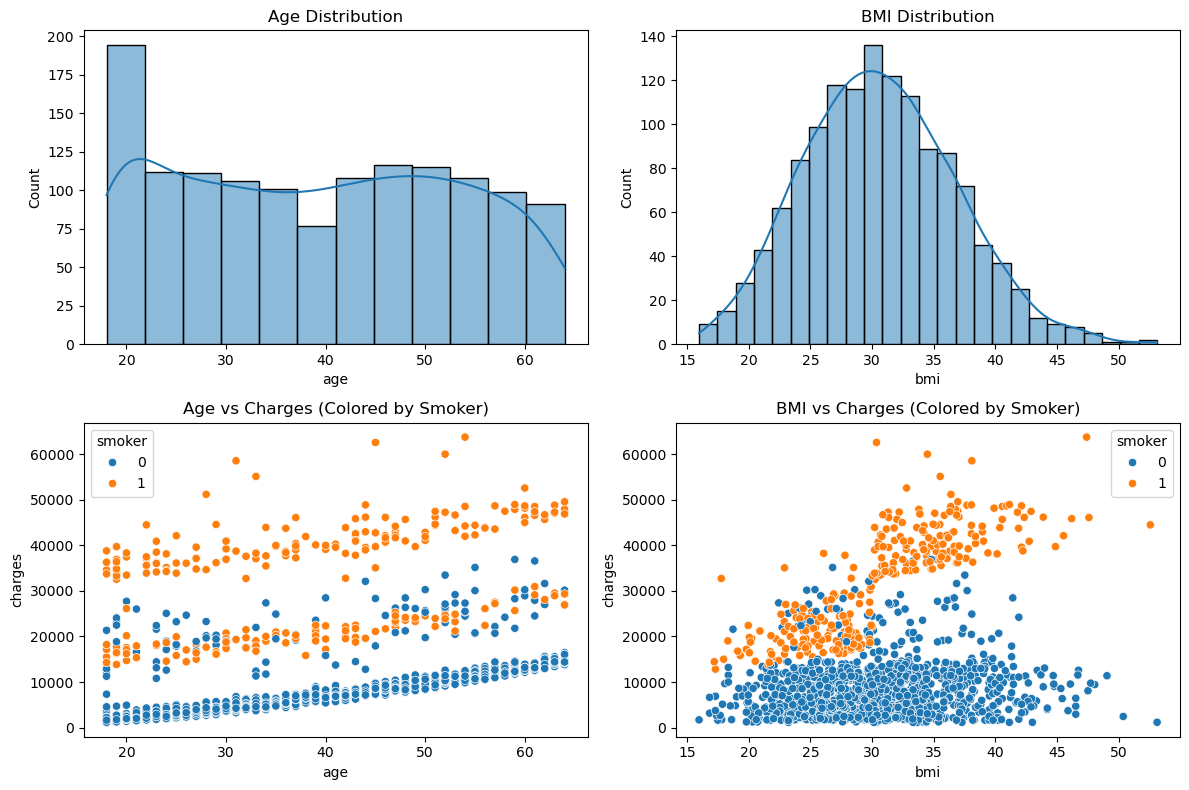

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Sample data (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Converting category labels into numerical using LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

# Features (X) and Target (y)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features for gradient descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'standard_scaler.pkl')
print("Scaler saved as 'standard_scaler.pkl'")

# Custom Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize weights (coefficients)
    bias = 0  # Initialize bias term
    losses = []
    
    for iteration in range(n_iterations):
        # Predictions
        y_pred = X.dot(theta) + bias  # Linear model: y = X * theta + bias
        
        # Errors
        error = y_pred - y
        
        # Gradients
        gradient_theta = (1/m) * X.T.dot(error)  # Gradient for weights
        gradient_bias = (1/m) * np.sum(error)  # Gradient for bias
        
        # Update weights and bias
        theta -= learning_rate * gradient_theta
        bias -= learning_rate * gradient_bias
        
        # Calculate and store loss (MSE)
        loss = np.mean(error ** 2)
        losses.append(loss)
    
    return theta, bias, losses

# Train the model using custom gradient descent
theta, bias, losses = gradient_descent(X_train_scaled, y_train, learning_rate=0.01, n_iterations=1000)

# Predict function for custom gradient descent
def predict(X, theta, bias):
    return X.dot(theta) + bias

# Decision Tree Regressor with Hyperparameter Tuning
dt_model = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)
dt_model = dt_grid.best_estimator_

# Random Forest Regressor with Hyperparameter Tuning
rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {
   'n_estimators': [100, 200, 300, 400, 500, 600,700],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = RandomizedSearchCV(rf_model, param_grid_rf, n_iter=50, cv=10, scoring='neg_mean_squared_error', random_state=42)
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_

# Evaluate all models
models = ['Linear Regression (GD)', 'Decision Tree', 'Random Forest']
train_mse = [mean_squared_error(y_train, predict(X_train_scaled, theta, bias)), 
             mean_squared_error(y_train, dt_model.predict(X_train)), 
             mean_squared_error(y_train, rf_model.predict(X_train))]

test_mse = [mean_squared_error(y_test, predict(X_test_scaled, theta, bias)), 
            mean_squared_error(y_test, dt_model.predict(X_test)), 
            mean_squared_error(y_test, rf_model.predict(X_test))]

train_r2 = [r2_score(y_train, predict(X_train_scaled, theta, bias)), 
            r2_score(y_train, dt_model.predict(X_train)), 
            r2_score(y_train, rf_model.predict(X_train))]

test_r2 = [r2_score(y_test, predict(X_test_scaled, theta, bias)), 
           r2_score(y_test, dt_model.predict(X_test)), 
           r2_score(y_test, rf_model.predict(X_test))]

# Model Performance Summary
model_performance = {
    'Model': models,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train MSE': train_mse,
    'Test MSE': test_mse,
}

performance_df = pd.DataFrame(model_performance)
print("Model Performance Summary:")
print(performance_df)

# Plotting loss curves for each model
plt.figure(figsize=(12, 8))

# Gradient Descent Linear Regression Loss Curve
plt.subplot(2, 2, 1)
plt.plot(losses, label="Training Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - Linear Regression (GD)')
plt.legend()

# Decision Tree Feature Importance
plt.subplot(2, 2, 2)
importances = dt_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree')

# Random Forest Feature Importance
plt.subplot(2, 2, 3)
importances = rf_model.feature_importances_
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')

plt.tight_layout()
plt.show()

# Prediction vs Actual Plot for each model (Train Data)
plt.figure(figsize=(12, 8))

# Linear Regression (GD) Prediction vs Actual
plt.subplot(2, 2, 1)
train_pred_gd = predict(X_train_scaled, theta, bias)
plt.scatter(y_train, train_pred_gd, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)
plt.title('Prediction vs Actual (Train Data) - Linear Regression (GD)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Decision Tree Prediction vs Actual
plt.subplot(2, 2, 2)
train_pred_dt = dt_model.predict(X_train)
plt.scatter(y_train, train_pred_dt, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)
plt.title('Prediction vs Actual (Train Data) - Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest Prediction vs Actual
plt.subplot(2, 2, 3)
train_pred_rf = rf_model.predict(X_train)
plt.scatter(y_train, train_pred_rf, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)
plt.title('Prediction vs Actual (Train Data) - Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Residual Plot for each model (Train Data)
plt.figure(figsize=(12, 8))

# Linear Regression (GD) Residual Plot
plt.subplot(2, 2, 1)
train_residuals_gd = y_train - train_pred_gd
plt.scatter(train_pred_gd, train_residuals_gd, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Train Data) - Linear Regression (GD)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Decision Tree Residual Plot
plt.subplot(2, 2, 2)
train_residuals_dt = y_train - train_pred_dt
plt.scatter(train_pred_dt, train_residuals_dt, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Train Data) - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Random Forest Residual Plot
plt.subplot(2, 2, 3)
train_residuals_rf = y_train - train_pred_rf
plt.scatter(train_pred_rf, train_residuals_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Train Data) - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Model Comparison Bar Plot (MSE and R2)
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting Train and Test R2
width = 0.35  # width of bars
x = np.arange(len(models))
ax.bar(x - width/2, train_r2, width, label='Train R2', color='blue')
ax.bar(x + width/2, test_r2, width, label='Test R2', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Saving the best model (with highest test R2)
best_model = models[np.argmax(test_r2)]
print(f"\nBest Performing Model: {best_model}")

# Save the best model using joblib
best_model_index = np.argmax(test_r2)
best_model_object = [theta, dt_model, rf_model][best_model_index]
joblib.dump(best_model_object, f'{best_model}_best_model.pkl')
print(f"Best model saved as '{best_model}_best_model.pkl'")

# Make a prediction on one data point in the test dataset
sample_data = X_test_scaled[0].reshape(1, -1)
prediction = predict(sample_data, theta, bias)
print(f"\nPrediction for one data point in the test dataset: {prediction}")

# Scatter plot of the final linear line that fits the dataset after training the linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predict(X_test_scaled, theta, bias), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Final Linear Regression Line (Test Data)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Variable Distributions (Histograms and Scatterplots)
plt.figure(figsize=(12, 8))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

# Scatterplots
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'])
plt.title('Age vs Charges (Colored by Smoker)')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
plt.title('BMI vs Charges (Colored by Smoker)')

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the trained Random Forest model and scaler
best_model = joblib.load('Random Forest_best_model.pkl')
scaler = joblib.load('standard_scaler.pkl')

# New data point for prediction
data = {
    'age': 32,  
    'sex': 'male',  
    'bmi': 28.880,  
    'children': 0,  
    'smoker': 'no',  
    'region': 'northwest' 
}

# Convert to DataFrame
df_new = pd.DataFrame([data])

# Encode categorical variables (match categories used during training)
label = LabelEncoder()

# Encode 'sex'
label.fit(["male", "female"])  
df_new['sex'] = label.transform([data['sex']])

# Encode 'smoker'
label.fit(["yes", "no"])  
df_new['smoker'] = label.transform([data['smoker']])

# Encode 'region'
label.fit(["southwest", "southeast", "northwest", "northeast"])  
df_new['region'] = label.transform([data['region']])

# Ensure column order matches the training data
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
df_new = df_new[feature_names]

# Standardize features using the trained scaler
X_new_scaled = scaler.transform(df_new)

# Convert back to a DataFrame with feature names (to avoid warnings)
X_new_scaled_df = pd.DataFrame(X_new_scaled, columns=feature_names)

# Predict using the Random Forest model
prediction = best_model.predict(X_new_scaled_df)

# Print the predicted charges
print(f"Predicted Charges: ${prediction[0]:.2f}")

Predicted Charges: $2286.67
